In [1]:
import numpy as np
from scipy import stats, signal
import matplotlib.pyplot as plt
%matplotlib inline

 - https://docs.scipy.org/doc/scipy/reference/signal.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
 - https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter
 - https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.signal.savgol_filter.html

In [2]:
N = 10000
t = np.linspace(0, 100, N)

In [3]:
baseline = 8e-4*t + 0.71 + np.random.randn(N)*5e-3

In [4]:
p1 = stats.norm(scale=0.1, loc=20).pdf(t)
p2 = stats.norm(scale=0.2, loc=40).pdf(t)
p3 = stats.norm(scale=0.15, loc=60).pdf(t)
p4 = stats.norm(scale=0.25, loc=61).pdf(t)
p5 = stats.lognorm(0.3, loc=75).pdf(t)
p6 = stats.lognorm(0.4, loc=80, scale=0.5).pdf(t)

In [13]:
gt = baseline+p1+p2+p3+p4+p5+p6
gtf = signal.savgol_filter(tuple(gt), polyorder=3, window_length=25)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [14]:
peak = signal.find_peaks(gtf, height=1.0, threshold=1e-4, width=0.5, prominence=1)
#peak = signal.find_peaks(gt, height=1.0, threshold=2e-3, width=0.1, prominence=1, distance=100)
peak

(array([2000, 3999, 5999, 6099, 7590, 8042], dtype=int64),
 {'peak_heights': array([4.63831711, 2.73415924, 3.40560881, 2.35341407, 2.1589504 ,
         2.93198458]),
  'left_thresholds': array([0.01147365, 0.00440471, 0.01045316, 0.00291235, 0.0018608 ,
         0.00322973]),
  'right_thresholds': array([0.02486641, 0.00092058, 0.00166267, 0.00069678, 0.00018829,
         0.00396189]),
  'prominences': array([3.91471164, 1.99367   , 2.64933224, 1.43366549, 1.39970496,
         2.15929013]),
  'left_bases': array([   0, 2190, 2190, 6041, 6260, 6260], dtype=int64),
  'right_bases': array([2190, 4182, 6260, 6260, 8006, 8225], dtype=int64),
  'widths': array([24.25731436, 47.24945233, 35.65192689, 54.67145667, 66.39200392,
         41.66789791]),
  'width_heights': array([2.68096129, 1.73732424, 2.0809427 , 1.63658133, 1.45909792,
         1.85233951]),
  'left_ips': array([1987.67350317, 3975.96116301, 5981.61864288, 6072.04949698,
         7563.20301033, 8025.84977564]),
  'right_ips': 

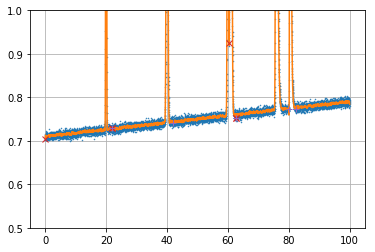

In [19]:
fig, axe = plt.subplots()
axe.plot(t, gt, '.', markersize=1)
axe.plot(t, gtf)
axe.plot(t[peak[0]], gt[peak[0]], 'o')
axe.plot(t[peak[1]['left_bases']], gt[peak[1]['left_bases']], 'x')
axe.plot(t[peak[1]['right_bases']], gt[peak[1]['right_bases']], '+')
#axe.set_xlim([55,65])
axe.set_ylim([0.5, 1.0])
axe.grid()
#fig.savefig("chromato.svg")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
